In [43]:
import pandas as pd
import psycopg2
import numpy as np
import seaborn as sns

In [45]:
querry = """
SELECT * FROM passenger_sat;
"""

df = pd.read_sql(querry, conn)
df

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\201763179.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(querry, conn)


,id,gender,age,costumer_type,travel_type,class,flight_distance,dep_delay,arr_delay,dep_arr_tim_conv,...,onboard_serv,seat_comf,legroom_serv,cleanliness,food_n_drink,inflight_serv,inflight_wifi_serv,inflight_entertainment,baggage_handling,satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      129880 non-null  int64  
 1   gender                  129880 non-null  object 
 2   age                     129880 non-null  int64  
 3   costumer_type           129880 non-null  object 
 4   travel_type             129880 non-null  object 
 5   class                   129880 non-null  object 
 6   flight_distance         129880 non-null  int64  
 7   dep_delay               129880 non-null  int64  
 8   arr_delay               129487 non-null  float64
 9   dep_arr_tim_conv        129880 non-null  int64  
 10  ease_of_onl_book        129880 non-null  int64  
 11  checkin_serv            129880 non-null  int64  
 12  onl_boarding            129880 non-null  int64  
 13  gate_loc                129880 non-null  int64  
 14  onboard_serv        

In [47]:
df.describe()

,id,age,flight_distance,dep_delay,arr_delay,dep_arr_tim_conv,ease_of_onl_book,checkin_serv,onl_boarding,gate_loc,onboard_serv,seat_comf,legroom_serv,cleanliness,food_n_drink,inflight_serv,inflight_wifi_serv,inflight_entertainment,baggage_handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Recommend Analysis

## 1. Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

In [48]:
querry ="""
SELECT
    satisfaction,
    COUNT(*) AS count,
    (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM passenger_sat)) AS percentage
FROM
    passenger_sat
GROUP BY
    satisfaction;
"""

kepuasan = pd.read_sql(querry, conn)
kepuasan

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\487775756.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  kepuasan = pd.read_sql(querry, conn)


,satisfaction,count,percentage
0,Neutral or Dissatisfied,73452,56.553742
1,Satisfied,56428,43.446258


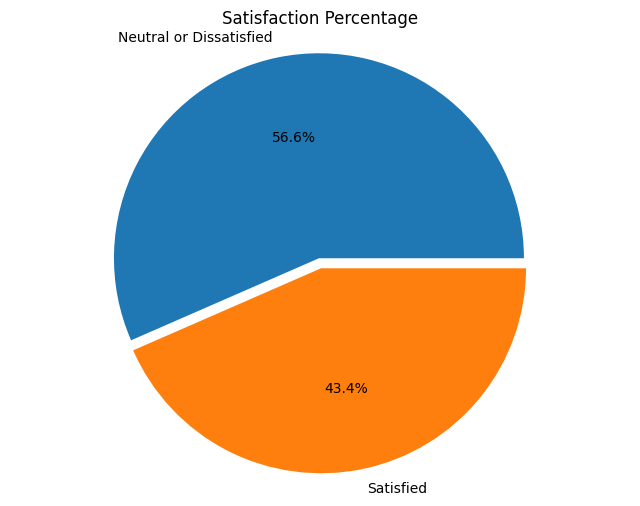

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(kepuasan['count'], labels=kepuasan['satisfaction'], autopct='%1.1f%%', explode=(0.05, 0))
plt.title('Satisfaction Percentage')
plt.axis('equal')
plt.show()

From these results, it was obtained that the percentage of satisfied customers was 43.4%

In [50]:
querry="""
SELECT
    costumer_type,
    SUM(CASE WHEN satisfaction = 'Satisfied' THEN 1 ELSE 0 END) AS satisfied,    
    (SUM(CASE WHEN satisfaction = 'Satisfied' THEN 1 ELSE 0 END) * 100.0 / COUNT(*))
    AS satisfied_percentage,
    (SUM(CASE WHEN satisfaction = 'Neutral or Dissatisfied' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) 
    AS neutral_or_dissatisfied_percentage,
    SUM(CASE WHEN satisfaction = 'Neutral or Dissatisfied' THEN 1 ELSE 0 END) 
    AS neutral_or_dissatisfied
FROM
    passenger_sat
GROUP BY
    costumer_type;

"""

satis_by_cost_type = pd.read_sql(querry, conn)
satis_by_cost_type

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\1664737244.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  satis_by_cost_type = pd.read_sql(querry, conn)


,costumer_type,satisfied,satisfied_percentage,neutral_or_dissatisfied_percentage,neutral_or_dissatisfied
0,First-time,5700,23.969722,76.030278,18080
1,Returning,50728,47.811499,52.188501,55372


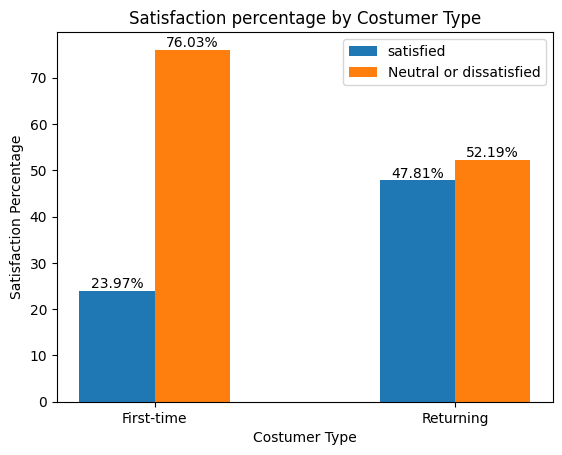

<Figure size 2000x800 with 0 Axes>

In [51]:
bar_width = 0.25
indeks = range(len(satis_by_cost_type['costumer_type']))
fig, ax = plt.subplots()
bar1 = ax.bar(indeks, satis_by_cost_type['satisfied_percentage'], bar_width, label='satisfied')
bar2 = ax.bar([i + bar_width for i in indeks], satis_by_cost_type['neutral_or_dissatisfied_percentage'], bar_width, label='Neutral or dissatisfied')

for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, '%.2f%%' % height, ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, '%.2f%%' % height, ha='center', va='bottom')

ax.set_xlabel('Costumer Type')
ax.set_ylabel('Satisfaction Percentage')
ax.set_title('Satisfaction percentage by Costumer Type')
ax.set_xticks([i + bar_width / 2 for i in indeks])
ax.set_xticklabels(satis_by_cost_type['costumer_type'])
ax.legend()
plt.figure(figsize=(20, 8))
plt.show()

From these results, it was obtained that:
- Satisfaction percentage of first-time  type customer is 23,97%
- Satisfaction percentage of Returning type customer is  47,81%

In [52]:
querry="""
SELECT
    travel_type,
    SUM(CASE WHEN satisfaction = 'Satisfied' THEN 1 ELSE 0 END) AS satisfied,    
    (SUM(CASE WHEN satisfaction = 'Satisfied' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) 
    AS satisfied_percentage,
    (SUM(CASE WHEN satisfaction = 'Neutral or Dissatisfied' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) 
    AS neutral_or_dissatisfied_percentage,
    SUM(CASE WHEN satisfaction = 'Neutral or Dissatisfied' THEN 1 ELSE 0 END) 
    AS neutral_or_dissatisfied
FROM
    passenger_sat
GROUP BY
    travel_type;

"""

satis_by_travel_type = pd.read_sql(querry, conn)
satis_by_travel_type

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\3015212450.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  satis_by_travel_type = pd.read_sql(querry, conn)


,travel_type,satisfied,satisfied_percentage,neutral_or_dissatisfied_percentage,neutral_or_dissatisfied
0,Business,52356,58.372448,41.627552,37337
1,Personal,4072,10.132630,89.867370,36115


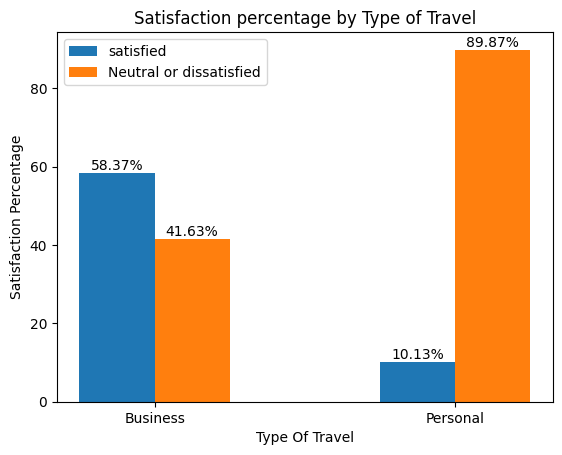

In [53]:
bar_width = 0.25
indeks = range(len(satis_by_travel_type['travel_type']))
fig, ax = plt.subplots()
bar1 = ax.bar(indeks, satis_by_travel_type['satisfied_percentage'], bar_width, label='satisfied')
bar2 = ax.bar([i + bar_width for i in indeks], satis_by_travel_type['neutral_or_dissatisfied_percentage'], bar_width, label='Neutral or dissatisfied')

for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, '%.2f%%' % height, ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, '%.2f%%' % height, ha='center', va='bottom')


ax.set_xlabel('Type Of Travel')
ax.set_ylabel('Satisfaction Percentage')
ax.set_title('Satisfaction percentage by Type of Travel')
ax.set_xticks([i + bar_width / 2 for i in indeks])
ax.set_xticklabels(satis_by_travel_type['travel_type'])
ax.legend()

plt.show()

- Satisfaction percentage of Business travel type is 58,37%
- Satisfaction percentage of Personal travel type is 10,13%

## 2. What is the Customer Profile for a repeating Airline Passenger?

Customers who become repeating passengers are returning customer types (customer_type = 'Returning). Therefore, we need to filter the data and analyze the profile of this returning type.

### Customer Profile by Age and Class
I have grouped the ages into 5 age groups as per the query below to find out customer segmentation based on their age group.

In [54]:
query = """
SELECT
    CASE
        WHEN age BETWEEN 5 AND 12 THEN 'School Aged (5-12)'
        WHEN age BETWEEN 13 AND 19 THEN 'Teenager (13-19)'
        WHEN age BETWEEN 20 AND 39 THEN 'Young-adult (20-39)'
        WHEN age BETWEEN 40 AND 59 THEN 'Middle-aged (40-59)'
        WHEN age >= 60 THEN 'Senior (60+)'
        ELSE 'Unknown'
    END AS age_group,
    class,
    count(*) AS count
FROM
    passenger_sat
Group by
	age_group, costumer_type, class
HAVING
	costumer_type = 'Returning'
"""

returning_age_class = pd.read_sql(query, conn)
returning_age_class

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\3306069191.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  returning_age_class = pd.read_sql(query, conn)


,age_group,class,count
0,Middle-aged (40-59),Business,30393
1,Middle-aged (40-59),Economy,16750
2,Middle-aged (40-59),Economy Plus,2891
3,School Aged (5-12),Business,589
4,School Aged (5-12),Economy,3140
5,School Aged (5-12),Economy Plus,523
6,Senior (60+),Business,3698
7,Senior (60+),Economy,6758
8,Senior (60+),Economy Plus,1230
9,Teenager (13-19),Business,1310


Text(0.5, 1.0, 'Passenger Profile By Age & Class')

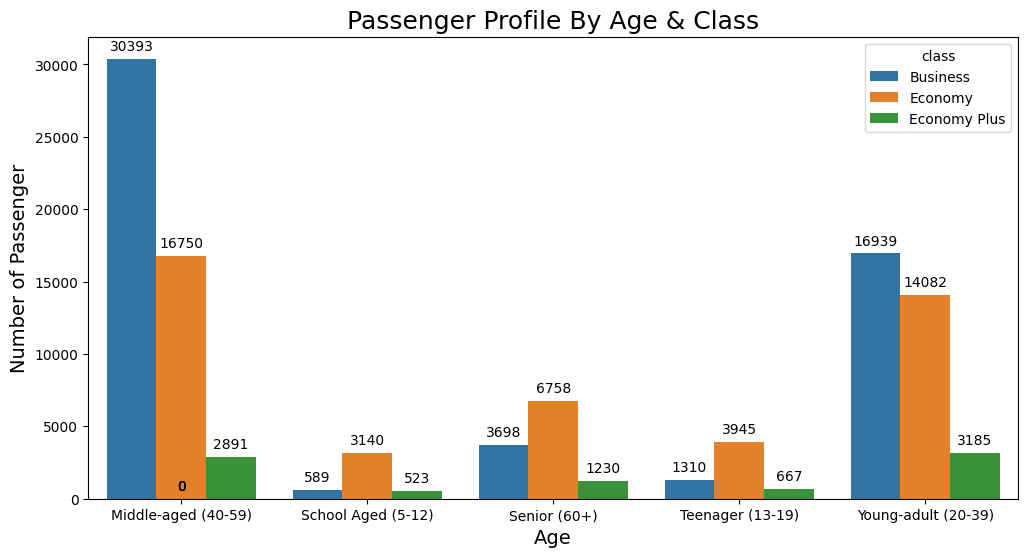

In [55]:
plt.figure(figsize=(12, 6)) 
splot = sns.barplot(x="age_group", y="count", hue="class", data=returning_age_class) 

for p in splot.patches: 
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 

plt.ylabel("Number of Passenger", size=14) 
plt.xlabel("Age", size=14) 
plt.title("Passenger Profile By Age & Class", size=18) 

**Insight:**
1. Economy class passengers are mostly filled with school aged passengers, teenagers and seniors.
2. Business class passengers are mostly filled with middle aged and young adult passengers

### Customer Profile by gender

In [56]:
query = """
SELECT
	gender,
    count(*) AS count
FROM
	passenger_sat
GROUP BY
	gender, costumer_type
HAVING
	costumer_type = 'Returning'
"""

returning_cust_gender = pd.read_sql(query, conn)
returning_cust_gender

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\4050531797.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  returning_cust_gender = pd.read_sql(query, conn)


,gender,count
0,Female,53056
1,Male,53044


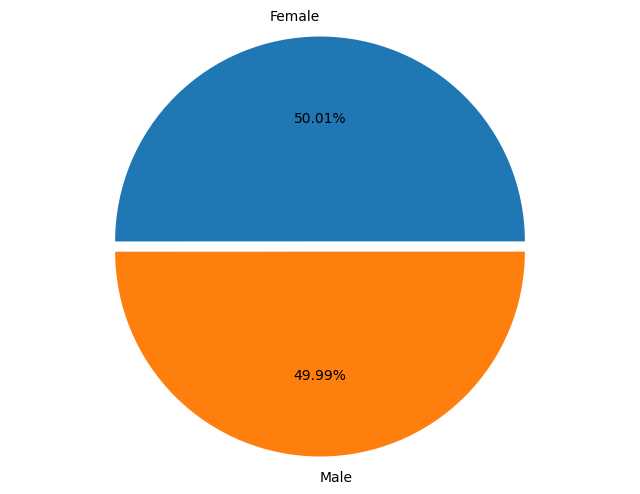

In [57]:
plt.figure(figsize=(8, 6))
plt.pie(returning_cust_gender['count'], labels=returning_cust_gender['gender'], autopct='%1.2f%%', explode=(0.05, 0))
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

**Insight:**

From these results, it was found that the number of male and female passengers was almost the same or that there were slightly more female passengers than male passengers

### Customer Profile by age & gender

In [58]:
query = """
SELECT
    CASE
        WHEN age BETWEEN 5 AND 12 THEN 'School Aged (5-12)'
        WHEN age BETWEEN 13 AND 19 THEN 'Teenager (13-19)'
        WHEN age BETWEEN 20 AND 39 THEN 'Young-adult (20-39)'
        WHEN age BETWEEN 40 AND 59 THEN 'Middle-aged (40-59)'
        WHEN age >= 60 THEN 'Senior (60+)'
        ELSE 'Unknown'
    END AS age_group,
    gender,
    count(*) AS count
FROM
    passenger_sat
Group by
	age_group, costumer_type, gender
HAVING
	costumer_type = 'Returning'
"""

returning_age_gender = pd.read_sql(query, conn)
returning_age_gender

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\713699454.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  returning_age_gender = pd.read_sql(query, conn)


,age_group,gender,count
0,Middle-aged (40-59),Female,25040
1,Middle-aged (40-59),Male,24994
2,School Aged (5-12),Female,2141
3,School Aged (5-12),Male,2111
4,Senior (60+),Female,5863
5,Senior (60+),Male,5823
6,Teenager (13-19),Female,2985
7,Teenager (13-19),Male,2937
8,Young-adult (20-39),Female,17027
9,Young-adult (20-39),Male,17179


Text(0.5, 1.0, 'Passenger Profile By Age & Gender')

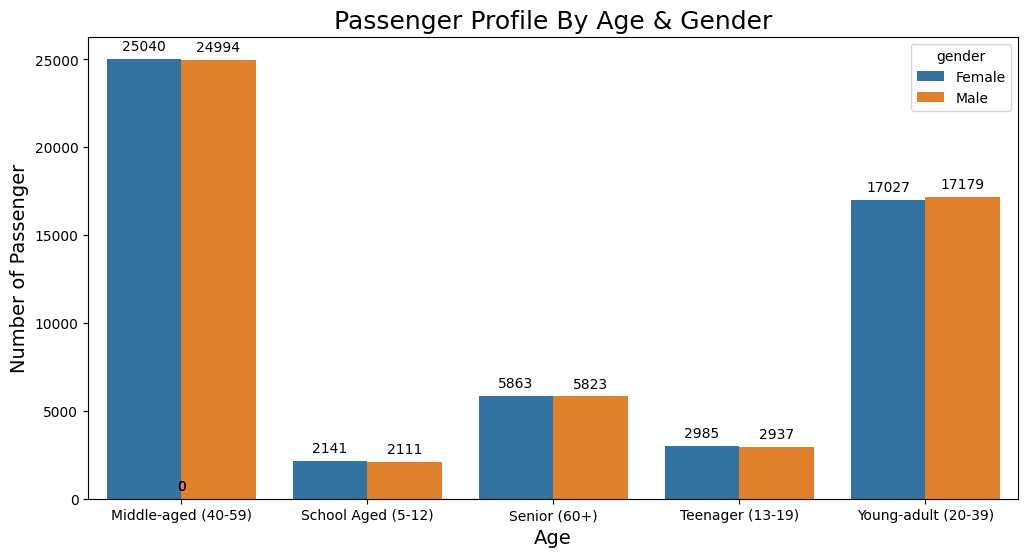

In [59]:
plt.figure(figsize=(12, 6)) 
splot = sns.barplot(x="age_group", y="count", hue="gender", data=returning_age_gender) 

for p in splot.patches: 
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 

plt.ylabel("Number of Passenger", size=14) 
plt.xlabel("Age", size=14) 
plt.title("Passenger Profile By Age & Gender", size=18) 

**Insight:**

From these results, it was found that the number of male and female passengers in each age group was almost the same

## 3. Does Flight Distance affect customer preference or flight pattern?

I first grouped flying distance into several groups. Based on aviation standards, there are 3 flight distance groups, namely short-haul (<900 miles), medium-haul (900-2200 miles), and long-haul (>2200 miles).

In [60]:
querry="""
SELECT
    CASE
        WHEN flight_distance < 900 THEN 'Short-haul (0-899 miles)'
        WHEN flight_distance >= 900 AND flight_distance <= 2200 THEN 'Medium-haul (900-2200 miles)'
        ELSE 'Long-haul (2200+ miles)'
    END AS flight_distance_group,
    class,
    count(*) as count
FROM
    passenger_sat
group by
    flight_distance_group, class
order by
    flight_distance_group;

"""

flight_distance = pd.read_sql(querry, conn)
flight_distance

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\903602663.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  flight_distance = pd.read_sql(querry, conn)


,flight_distance_group,class,count
0,Long-haul (2200+ miles),Economy,2038
1,Long-haul (2200+ miles),Business,21041
2,Long-haul (2200+ miles),Economy Plus,407
3,Medium-haul (900-2200 miles),Business,19598
4,Medium-haul (900-2200 miles),Economy Plus,2396
5,Medium-haul (900-2200 miles),Economy,15685
6,Short-haul (0-899 miles),Economy,40586
7,Short-haul (0-899 miles),Business,21521
8,Short-haul (0-899 miles),Economy Plus,6608


Text(0.5, 1.0, 'customer preference by Flight Distance')

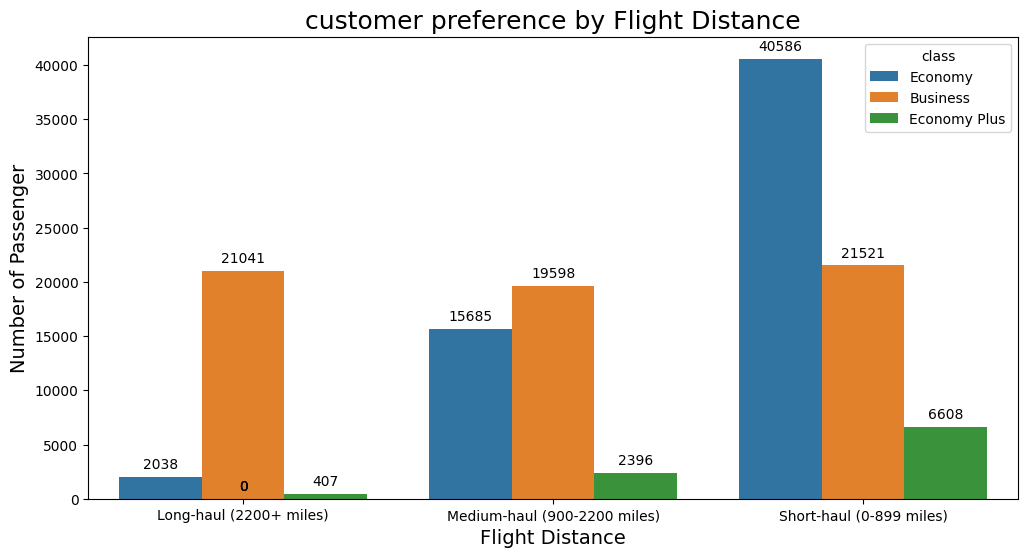

In [61]:
plt.figure(figsize=(12, 6)) 
splot = sns.barplot(x="flight_distance_group", y="count", hue="class", data=flight_distance) 

for p in splot.patches: 
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 

plt.ylabel("Number of Passenger", size=14) 
plt.xlabel("Flight Distance", size=14) 
plt.title("customer preference by Flight Distance", size=18) 

**Insight:**

From these results, it was found that customers prefer economy class for short-haul and business for medium and long-haul.

## 4. Which Factors contribute to customer satisfaction the most? what about dissatisfaction?

In [62]:
df_update = df

In [63]:
df_update['satisfaction'] = df_update['satisfaction'].map({'Satisfied' : 1, 'Neutral or Dissatisfied' : 0})
df_update['class'] = df_update['class'].map({'Economy' : 1, 'Economy Plus' : 2, 'Business' : 3})
df_update['costumer_type'] = df_update['costumer_type'].map({'First-time' : 1, 'Returning' : 2})
df_update['travel_type'] = df_update['travel_type'].map({'Personal' : 1, 'Business' : 2})
df_update['gender'] = df_update['gender'].map({'Male' : 1, 'Female' : 0})

,id,gender,age,costumer_type,travel_type,class,flight_distance,dep_delay,arr_delay,dep_arr_tim_conv,...,onboard_serv,seat_comf,legroom_serv,cleanliness,food_n_drink,inflight_serv,inflight_wifi_serv,inflight_entertainment,baggage_handling,satisfaction
0,1,1,48,1,2,3,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,2,2,3,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,2,2,3,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,2,2,3,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,2,2,3,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,1,28,2,1,2,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,0
129876,129877,1,41,2,1,2,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,0
129877,129878,1,42,2,1,2,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,0
129878,129879,1,50,2,1,2,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,1


C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\1591403002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_correlation.values, y=satisfaction_correlation.index, palette='viridis')


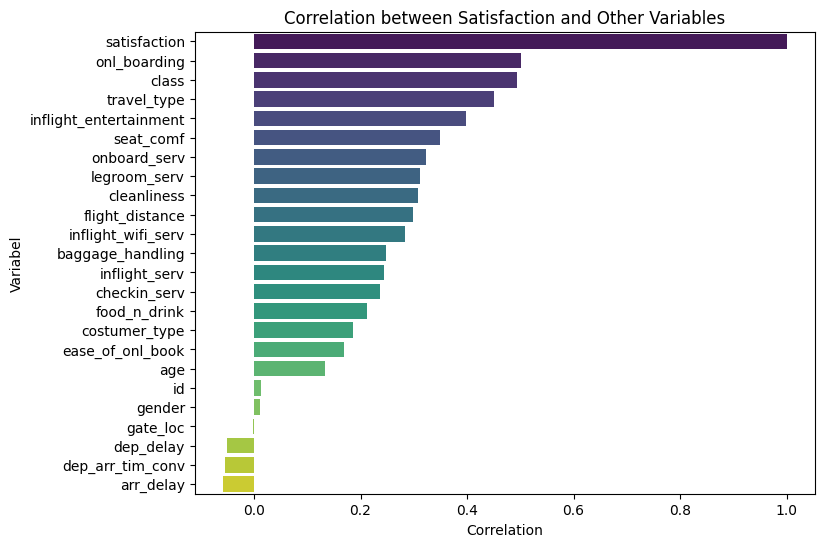

In [70]:
correlation_matrix = df.corr()
satisfaction_correlation = correlation_matrix['satisfaction'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=satisfaction_correlation.values, y=satisfaction_correlation.index, palette='viridis')
plt.xlabel('Correlation')
plt.ylabel('Variabel')
plt.title('Correlation between Satisfaction and Other Variables')
plt.show()

**Insight:**

From these results, it was found that the factor that most influences satisfaction is online boarding. The correlation is a positive correlation, so the higher the online boarding satisfaction, the more satisfied the passengers will be. On the other hand, if the level of online boarding satisfaction is lower, the more dissatisfied passengers will be

## 5. What is the average departure delay and arrival delay?

In [64]:
query = """
SELECT
    AVG(dep_delay) AS dep_delay_average,
    AVG(arr_delay) AS  arr_delay_average
FROM
    passenger_sat
"""

average = pd.read_sql(query, conn)
average

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\3910919025.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  average = pd.read_sql(query, conn)


,dep_delay_average,arr_delay_average
0,14.713713,15.091129


**Insight:**

- Average departure delay is 14.7 minutes
- Average Arrival  delay is 15 minutes

## 6. What is the Average rating of On-board Service and Airline Service

In [65]:
query = """
SELECT
    AVG(inflight_serv) as inflight_service,
    AVG(inflight_wifi_serv) as inflight_wifi_service,
    AVG(inflight_entertainment) as inflight_entertainment,
    AVG(seat_comf) as seat_comfort,
    AVG(onboard_serv) as onboard_service,
    AVG(legroom_serv) as legroom_service,
    AVG(food_n_drink) as food_n_drink,
    AVG(cleanliness) as cleanliness
FROM
    passenger_sat
"""

average = pd.read_sql(query, conn)
average

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\782485819.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  average = pd.read_sql(query, conn)


,inflight_service,inflight_wifi_service,inflight_entertainment,seat_comfort,onboard_service,legroom_service,food_n_drink,cleanliness
0,3.642193,2.728696,3.358077,3.441361,3.383023,3.350878,3.204774,3.286326


**Insight:**

- Average rating of inflight service is 3.6
- Average rating of inflight wifi service is 2.7
- Average rating of inflight entertainment is 3.3
- Average rating of seat comfort is 3.4
- Average rating of onboard service is 3.3
- Average rating of legroom service is 3.3
- Average rating of food and drink is 3.2
- Average rating of cleanliness is 3.2

In [66]:
query = """
SELECT
    AVG(ease_of_onl_book) as Online_Book,
    AVG(checkin_serv) as checkin_service,
    AVG(onl_boarding) as online_boarding,
    AVG(gate_loc) as gate_location,
    AVG(baggage_handling) as baggage_handling
FROM
    passenger_sat
"""

average = pd.read_sql(query, conn)
average

C:\Users\khafidz\AppData\Local\Temp\ipykernel_9472\728220572.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  average = pd.read_sql(query, conn)


,online_book,checkin_service,online_boarding,gate_location,baggage_handling
0,2.756876,3.306267,3.252633,2.976925,3.632114


**Insight:**

- Average rating of online book is 2.7
- Average rating of check in service is 3.3
- Average rating of online boarding is 3.2
- Average rating of gate location is 2.9
- Average rating of baggage handling is 3.6